<a href="https://colab.research.google.com/github/AWTT237/ASSIGNMENT2/blob/main/ASSIGNMENT7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# TODO: Import all the necessary libraries for data handling, visualization, and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [8]:

# Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.

# Load dataset
california = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add target column
df['MedHouseVal'] = california.target



In [11]:
#  Display the first few rows of the dataset to understand its structure.
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
#  Check the features and target variable. Identify which is continuous and categorical if applicable.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
#  Check for missing/null values.

df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


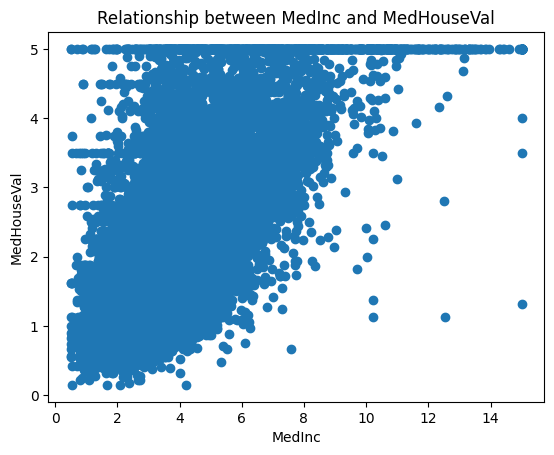

In [14]:
# Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.

plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Relationship between MedInc and MedHouseVal')
plt.show()

In [15]:
# Create a function to automate scatter plots for all features vs MedHouseVal.

def scatter_plots(df):
    features = df.drop(columns=['MedHouseVal']).columns
    for feature in features:
        plt.scatter(df[feature], df['MedHouseVal'])
        plt.xlabel(feature)
        plt.ylabel('MedHouseVal')
        plt.title(f'Relationship between {feature} and MedHouseVal')
        plt.show()



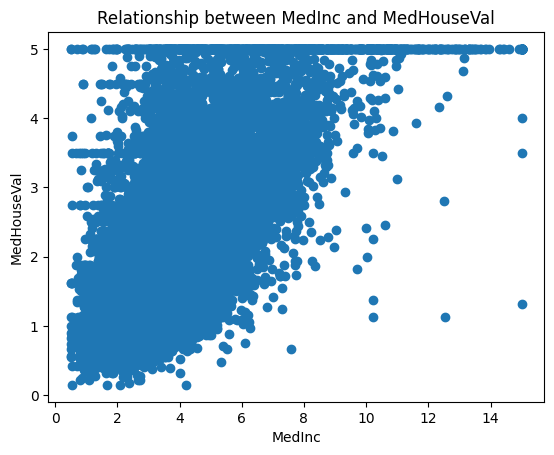

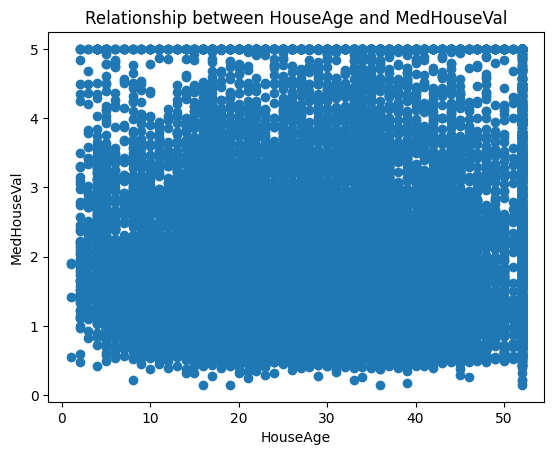

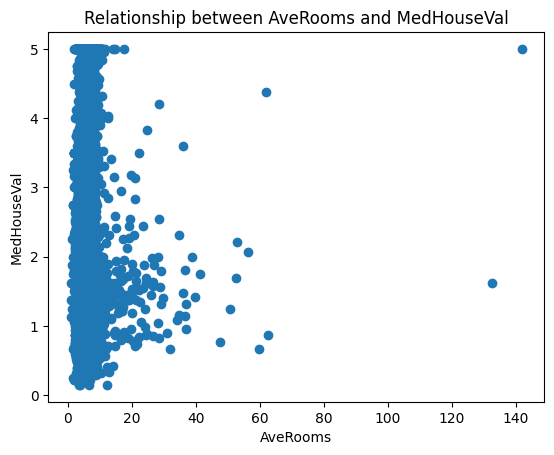

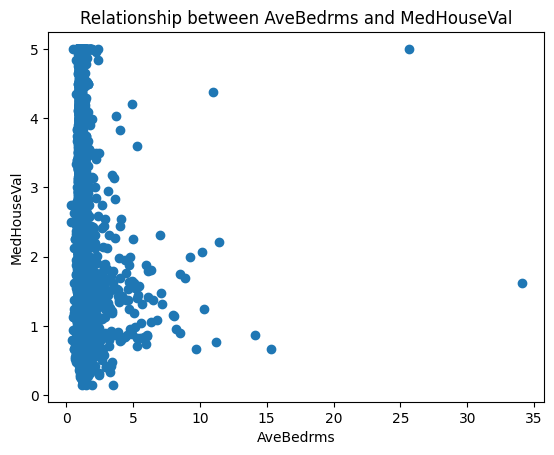

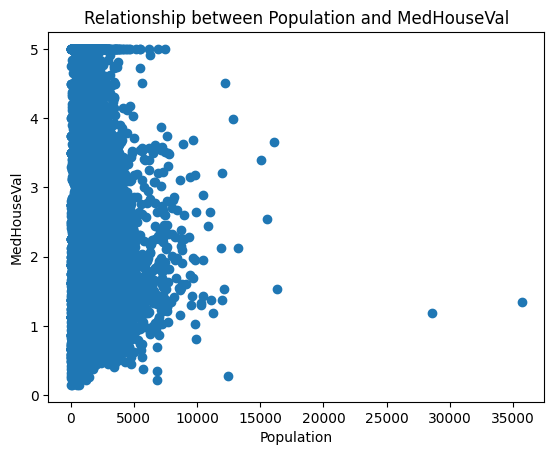

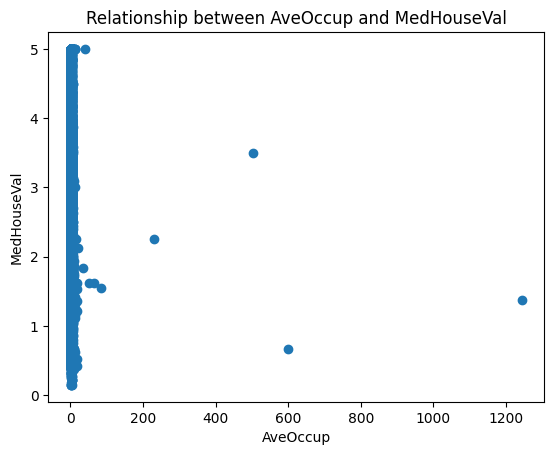

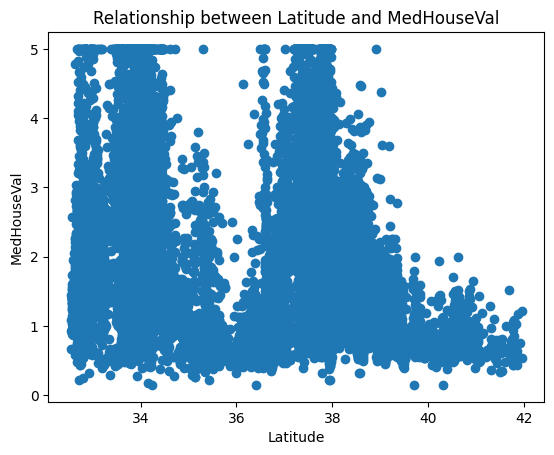

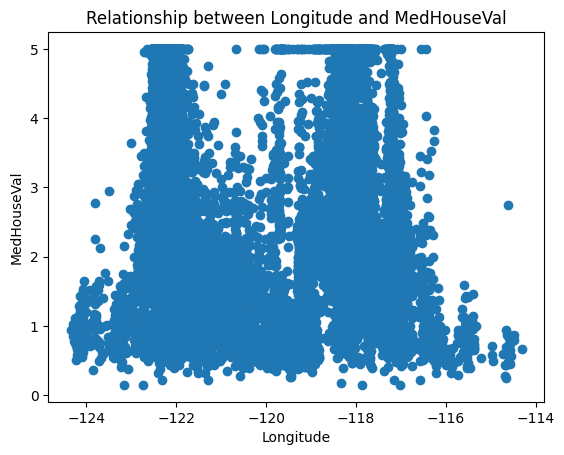

In [16]:
# Use the function to visualize the relationships between multiple features and the target variable.
scatter_plots(df)


In [17]:
# TODO: Split the dataset into training and testing sets.
# Define X (features) and y (target) and perform the train-test split:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

# Choose an appropriate regression model: Decision Tree or Random Forest.
# Define your regression model here:
model = RandomForestRegressor()



In [20]:
# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.
model.fit(X_train, y_train)



RandomForestRegressor()

In [21]:
# Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Predict on the test set and calculate the evaluation metrics:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.25399659310987804
R-squared: 0.8061699840832559


In [22]:
# Example new data (same order as training features)
new_data = [[3, 30, 6, 1, 3, 1500, 34, -118]]  # Adjust order if your model expects a different one

# Make prediction
predicted_value = model.predict(new_data)

print("Predicted Median House Value:", predicted_value[0])


Predicted Median House Value: 1.9123304999999997


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
